In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append("../../src")
from dvs_sensor import DvsSensor
from event_buffer import EventBuffer
FRAME_DIR = "frames"
OUTPUT_DIR = "outputs"


In [16]:
im = cv2.imread("frames/frame_0015.png", cv2.IMREAD_GRAYSCALE)
im = im.astype(np.float32) / 255.0 * 1e4

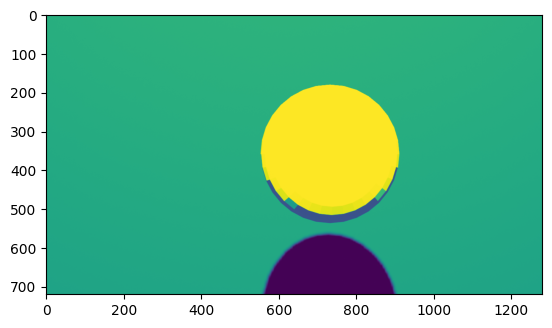

In [17]:
plt.imshow(im)
plt.show()

In [18]:
frame_files = sorted(
    [os.path.join(FRAME_DIR, f) for f in os.listdir(FRAME_DIR) if f.endswith(".png")]
)

In [24]:
th_pos = 0.4
th_neg = 0.4
th_noise = 0.01
lat = 100
tau = 40
jit = 10
bgnp = 0.1
bgnn = 0.01
ref = 100



In [23]:
sensor = DvsSensor("BallSensor")

In [25]:
sensor.initCamera(width, height, lat=lat, jit=jit, ref=ref, tau=tau,
                   th_pos=th_pos, th_neg=th_neg, th_noise=th_noise,
                   bgnp=bgnp, bgnn=bgnn)


In [26]:
sensor.init_bgn_hist("../../data/noise_pos_161lux.npy", "../../data/noise_neg_161lux.npy")


Noise Init: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 720/720 [00:05<00:00, 120.52it/s]


In [27]:
sensor.init_image(im.astype(np.float32) / 255.0 * 1e4)


In [29]:
dt = 1e6 / 15.0  # microseconds per frame at 30 fps
buffer = EventBuffer(1)

In [30]:
for f in frame_files[1:]:
    im = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    im = im.astype(np.float32) / 255.0 * 1e4
    events = sensor.update(im, dt)
    buffer.increase_ev(events)